In [206]:
import requests
import json
from tqdm.auto import tqdm
from collections import defaultdict
import pickle 
import pandas as pd

In [207]:
sber = '3529'
page = 1
num_per_page = 100
ekaterinburg = 1261
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={ekaterinburg}'

In [208]:
res = requests.get(url)

In [209]:
res.json()

{'items': [{'id': '44969668',
   'premium': False,
   'name': 'Клиентский менеджер (Эльмаш, г.Екатеринбург)',
   'department': {'id': '3529-3529-stat', 'name': 'Сбер. Начало карьеры'},
   'has_test': False,
   'response_letter_required': False,
   'area': {'id': '3',
    'name': 'Екатеринбург',
    'url': 'https://api.hh.ru/areas/3'},
   'salary': {'from': 52140, 'to': None, 'currency': 'RUR', 'gross': True},
   'type': {'id': 'open', 'name': 'Открытая'},
   'address': {'city': 'Екатеринбург',
    'street': 'Орджоникидзевский район, микрорайон Эльмаш, улица Баумана',
    'building': '49',
    'description': None,
    'lat': 56.896416,
    'lng': 60.639381,
    'raw': 'Екатеринбург, Орджоникидзевский район, микрорайон Эльмаш, улица Баумана, 49',
    'metro': None,
    'metro_stations': [],
    'id': '5649467'},
   'response_url': None,
   'sort_point_distance': None,
   'published_at': '2021-07-14T09:28:19+0300',
   'created_at': '2021-07-14T09:28:19+0300',
   'archived': False,
   'app

In [210]:
vacancies = res.json()

In [181]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [182]:
# vacancies.get('alternate_url')

In [183]:
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]
df = pd.DataFrame(vacancy_ids)

In [184]:
vacancy_ids[0]

'46687842'

In [185]:
all_vacancies = []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={ekaterinburg}'
    vacancies = res.json()
    num_pages = vacancies.get('pages')
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancies.extend(vacancy_ids)

  0%|          | 0/3 [00:00<?, ?it/s]

In [186]:
# Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти)
# Вытащите все описания этих вакансий
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
# Переведите даты публикаций в datetime
# Постройте график опубликованных вакансий по датам
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
# Найдите те вакансии с использованием python, которые вам интересны
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и
# Постройте график наиболее востребованных вакансий

In [187]:
# Вытащите все описания этих вакансий
all_vacancies = []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={ekaterinburg}'
    vacancies = res.json()
    num_pages = vacancies.get('pages')
    vacancy_snippet = [el.get('snippet') for el in vacancies.get('items')]
    all_vacancies.extend(vacancy_snippet)

  0%|          | 0/3 [00:00<?, ?it/s]

In [188]:
df = pd.DataFrame(all_vacancies)
df

,requirement,responsibility
0,Высшее образование (желательно психологическое...,Проведение исследований в крупномасштабных про...
1,Специалист с образованием от общего среднего. ...,Продавать продукты банка и экосистемы физическ...
2,Специалист со средним профессиональным/неполны...,Осуществлять операции по обслуживанию физическ...
3,Специалист со средним профессиональным/неполны...,Осуществлять операции по обслуживанию физическ...
4,Высшее образование (информационная безопасност...,"Обучение, консультации сотрудников Банка по пр..."
...,...,...
295,Опыт управления DS проектами. Глубокий опыт ра...,Анализ структурированных реляционных и неструк...
296,"Желательно знание SQL, ITIL. Опыт сопровождени...",Сопровождение Mission Critical АС по обслужива...
297,Специалист с образованием от общего среднего. ...,Продавать продукты банка и экосистемы физическ...
298,Опыт проектирования и разработки dashboard на ...,Участие в масштабном и долгосрочном проекте вн...


In [189]:
# Создайте аналогичный vacancy DataFrame только добавьте поле skills

df = pd.DataFrame(all_vacancies)
df ['skills'] = ''
df

,requirement,responsibility,skills
0,Высшее образование (желательно психологическое...,Проведение исследований в крупномасштабных про...,
1,Специалист с образованием от общего среднего. ...,Продавать продукты банка и экосистемы физическ...,
2,Специалист со средним профессиональным/неполны...,Осуществлять операции по обслуживанию физическ...,
3,Специалист со средним профессиональным/неполны...,Осуществлять операции по обслуживанию физическ...,
4,Высшее образование (информационная безопасност...,"Обучение, консультации сотрудников Банка по пр...",
...,...,...,...
295,Опыт управления DS проектами. Глубокий опыт ра...,Анализ структурированных реляционных и неструк...,
296,"Желательно знание SQL, ITIL. Опыт сопровождени...",Сопровождение Mission Critical АС по обслужива...,
297,Специалист с образованием от общего среднего. ...,Продавать продукты банка и экосистемы физическ...,
298,Опыт проектирования и разработки dashboard на ...,Участие в масштабном и долгосрочном проекте вн...,


In [190]:
# Переведите даты публикаций в datetime
all_vacancies = []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={ekaterinburg}'
    vacancies = res.json()
    num_pages = vacancies.get('pages')
    vacancy_snippet = [el.get('published_at') for el in vacancies.get('items')]
    all_vacancies.extend(vacancy_snippet)
    

  0%|          | 0/3 [00:00<?, ?it/s]

In [191]:
df = pd.DataFrame(all_vacancies)
df = df.rename({0 : 'Date_published'}, axis=1)

df['Date_published'] = pd.to_datetime(df.Date_published)
df['date'] = df['Date_published'].dt.date
df

,Date_published,date
0,2021-08-02 09:21:27+03:00,2021-08-02
1,2021-07-14 09:28:19+03:00,2021-07-14
2,2021-08-04 08:17:46+03:00,2021-08-04
3,2021-07-22 20:07:15+03:00,2021-07-22
4,2021-07-16 11:25:02+03:00,2021-07-16
...,...,...
295,2021-08-02 10:22:20+03:00,2021-08-02
296,2021-07-23 13:31:37+03:00,2021-07-23
297,2021-07-26 15:43:01+03:00,2021-07-26
298,2021-08-03 07:20:33+03:00,2021-08-03


In [192]:
print(df.dtypes)

Date_published    datetime64[ns, pytz.FixedOffset(180)]
date                                             object
dtype: object


<AxesSubplot:xlabel='Date_published'>

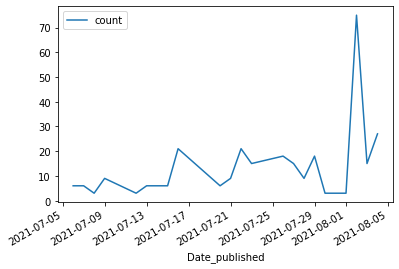

In [193]:
# Постройте график опубликованных вакансий по датам
import matplotlib.pyplot as plt
s = pd.to_datetime(df['Date_published'])
df = s.groupby(s.dt.floor('d')).size().reset_index(name='count')
df.plot(x='Date_published', y='count')

In [194]:
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий

df['day_of_week'] = df['Date_published'].dt.dayofweek
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
df['day_of_week'] = df['day_of_week'].apply(lambda x: days[x])
df

,Date_published,count,day_of_week
0,2021-07-06 00:00:00+03:00,6,Tues
1,2021-07-07 00:00:00+03:00,6,Weds
2,2021-07-08 00:00:00+03:00,3,Thurs
3,2021-07-09 00:00:00+03:00,9,Fri
4,2021-07-12 00:00:00+03:00,3,Mon
5,2021-07-13 00:00:00+03:00,6,Tues
6,2021-07-14 00:00:00+03:00,6,Weds
7,2021-07-15 00:00:00+03:00,6,Thurs
8,2021-07-16 00:00:00+03:00,21,Fri
9,2021-07-20 00:00:00+03:00,6,Tues


In [195]:
df.day_of_week.value_counts()

Tues     5
Weds     5
Fri      4
Thurs    4
Mon      3
Sun      1
Name: day_of_week, dtype: int64

In [214]:
# Найдите те вакансии с использованием python, которые вам интересны
all_vacancies = []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={ekaterinburg}'
    vacancies = res.json()
    num_pages = vacancies.get('pages')
    vacancy_snippet = [el.get('snippet') for el in vacancies.get('items')]
    all_vacancies.extend(vacancy_snippet)

  0%|          | 0/3 [00:00<?, ?it/s]

In [215]:
df = pd.DataFrame(all_vacancies)
mask = df['requirement'].str.contains(r"python")
res = df.loc[mask]
res

,requirement,responsibility
35,Высшее техническое/ математическое образование...,"Подготавливать ML модели, написанные на Python..."
135,Высшее техническое/ математическое образование...,"Подготавливать ML модели, написанные на Python..."
235,Высшее техническое/ математическое образование...,"Подготавливать ML модели, написанные на Python..."
